In [ ]:
import torch
import math
import numpy as np
import pandas as pd
import xlrd
import codecs
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
import warnings
from tqdm import tqdm
from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import matplotlib as mpl
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')

--2023-03-30 11:11:57--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  22.0MB/s    in 0.4s    

2023-03-30 11:11:58 (22.0 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FILE.xls to FILE.xls


In [ ]:
!pip uninstall xlrd

!pip install xlrd==1.2.0

Found existing installation: xlrd 1.2.0
Uninstalling xlrd-1.2.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.9/dist-packages/xlrd-1.2.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/xlrd/*
Proceed (Y/n)? y
  Successfully uninstalled xlrd-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-1.2.0-py2.py3-none-any.whl (103 kB)


加载execl文件

In [ ]:
data = pd.read_excel('FILE.xls','Sheet1',index_col=0)
data.to_csv('1.csv',encoding='utf-8')


In [ ]:
data

,M2 增长率,CPI 增长率,GDP 增长率,存款准备金率,基准利率贷款占比,对外直接投资额占 GDP 的比重,大型商业银行资产占银行业总资产比重,商业银行资金运用中非主要贷款类 资金占比,人民币贷款余额中主要金融机构 房地产贷款占比,( 企业债券 + 非金融企业境内股票融资) / 社会融资总规模,货币化率: M2 /GDP,资本化率: 股票、基金累计成交金额/GDP,资本充足率,不良贷款率,拨备覆盖率,流动性比例
2017,8.9,1.6,6.8,1.5,37.6,1.2,43.40,21.50,28.40,61.5,194.9,96.50,14.04,1.74,176.5,28.6
2018,8.1,2.1,6.7,1.5,38.1,1.6,44.70,20.40,28.50,68.1,190.8,73.90,13.91,1.89,180.1,28.8
2019,8.7,2.9,6.1,1.5,39.6,1.3,45.20,20.50,28.50,62.8,193.0,94.10,14.01,1.86,189.4,29.6
2020,10.1,2.5,2.3,1.5,40.4,1.4,46.10,19.50,28.60,60.2,209.8,119.70,14.43,1.92,204.1,30.1
2021,8.3,0.5,8.1,1.5,40.0,1.6,46.40,20.50,28.40,54.9,190.0,96.05,14.15,2.50,210.0,31.0
2022,7.5,2.6,8.2,1.5,45.0,1.5,45.16,20.48,28.48,61.5,195.7,96.05,14.00,2.80,210.0,32.0


In [ ]:
data_ = pd.get_dummies(data, sparse = True)

In [ ]:
data_

,M2 增长率,CPI 增长率,GDP 增长率,存款准备金率,基准利率贷款占比,对外直接投资额占 GDP 的比重,大型商业银行资产占银行业总资产比重,商业银行资金运用中非主要贷款类 资金占比,人民币贷款余额中主要金融机构 房地产贷款占比,( 企业债券 + 非金融企业境内股票融资) / 社会融资总规模,货币化率: M2 /GDP,资本化率: 股票、基金累计成交金额/GDP,资本充足率,不良贷款率,拨备覆盖率,流动性比例
2017,8.9,1.6,6.8,1.5,37.6,1.2,43.40,21.50,28.40,61.5,194.9,96.50,14.04,1.74,176.5,28.6
2018,8.1,2.1,6.7,1.5,38.1,1.6,44.70,20.40,28.50,68.1,190.8,73.90,13.91,1.89,180.1,28.8
2019,8.7,2.9,6.1,1.5,39.6,1.3,45.20,20.50,28.50,62.8,193.0,94.10,14.01,1.86,189.4,29.6
2020,10.1,2.5,2.3,1.5,40.4,1.4,46.10,19.50,28.60,60.2,209.8,119.70,14.43,1.92,204.1,30.1
2021,8.3,0.5,8.1,1.5,40.0,1.6,46.40,20.50,28.40,54.9,190.0,96.05,14.15,2.50,210.0,31.0
2022,7.5,2.6,8.2,1.5,45.0,1.5,45.16,20.48,28.48,61.5,195.7,96.05,14.00,2.80,210.0,32.0


In [ ]:
df = data_.corr()
df

,M2 增长率,CPI 增长率,GDP 增长率,存款准备金率,基准利率贷款占比,对外直接投资额占 GDP 的比重,大型商业银行资产占银行业总资产比重,商业银行资金运用中非主要贷款类 资金占比,人民币贷款余额中主要金融机构 房地产贷款占比,( 企业债券 + 非金融企业境内股票融资) / 社会融资总规模,货币化率: M2 /GDP,资本化率: 股票、基金累计成交金额/GDP,资本充足率,不良贷款率,拨备覆盖率,流动性比例
M2 增长率,1.000000,0.118970,-0.913183,NaN,-0.405414,-0.471495,0.157358,-0.403083,0.520496,-0.167137,0.774004,0.725132,0.811456,-0.629501,-0.090595,-0.382307
CPI 增长率,0.118970,1.000000,-0.414314,NaN,0.311396,-0.331039,-0.148480,-0.330882,0.708143,0.594877,0.409241,0.120748,-0.054731,-0.196138,-0.122904,-0.030244
GDP 增长率,-0.913183,-0.414314,1.000000,NaN,0.210473,0.304653,-0.225108,0.648026,-0.817590,-0.093695,-0.874900,-0.656665,-0.759259,0.552867,0.030874,0.289868
存款准备金率,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
基准利率贷款占比,-0.405414,0.311396,0.210473,NaN,1.000000,0.287072,0.387516,-0.323406,0.197075,-0.242653,0.188061,0.268319,0.074517,0.849934,0.777146,0.919172
对外直接投资额占 GDP 的比重,-0.471495,-0.331039,0.304653,NaN,0.287072,1.000000,0.576512,-0.421313,0.032733,-0.037424,-0.285260,-0.364844,-0.100044,0.574595,0.470946,0.445961
大型商业银行资产占银行业总资产比重,0.157358,-0.148480,-0.225108,NaN,0.387516,0.576512,1.000000,-0.782287,0.364436,-0.543994,0.250744,0.405916,0.571275,0.458181,0.824920,0.618426
商业银行资金运用中非主要贷款类 资金占比,-0.403083,-0.330882,0.648026,NaN,-0.323406,-0.421313,-0.782287,1.000000,-0.851904,0.047476,-0.626767,-0.456160,-0.636247,-0.126236,-0.554775,-0.341858
人民币贷款余额中主要金融机构 房地产贷款占比,0.520496,0.708143,-0.817590,NaN,0.197075,0.032733,0.364436,-0.851904,1.000000,0.332945,0.758774,0.427070,0.506491,-0.211551,0.171143,0.024499
( 企业债券 + 非金融企业境内股票融资) / 社会融资总规模,-0.167137,0.594877,-0.093695,NaN,-0.242653,-0.037424,-0.543994,0.047476,0.332945,1.000000,-0.107290,-0.581109,-0.545289,-0.451815,-0.677324,-0.544770


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline


import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore') #忽略警告

from tqdm import tqdm
# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

--2023-03-29 14:59:54--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  3.61MB/s    in 2.7s    

2023-03-29 14:59:58 (3.61 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



热力图，就是将协方差可视化

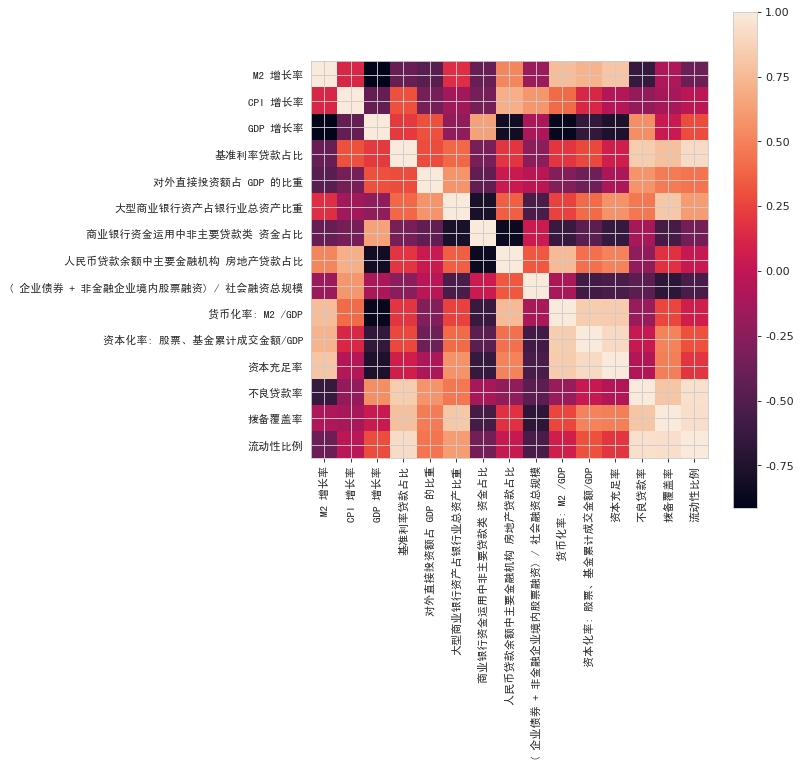

In [ ]:
# plot corr
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontproperties=zhfont)
    plt.yticks(range(len(corr.columns)), corr.columns, fontproperties=zhfont)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

plotCorrelationMatrix(data_, 8)

In [ ]:
data


,M2 增长率,CPI 增长率,GDP 增长率,存款准备金率,基准利率贷款占比,对外直接投资额占 GDP 的比重,大型商业银行资产占银行业总资产比重,商业银行资金运用中非主要贷款类 资金占比,人民币贷款余额中主要金融机构 房地产贷款占比,( 企业债券 + 非金融企业境内股票融资) / 社会融资总规模,货币化率: M2 /GDP,资本化率: 股票、基金累计成交金额/GDP,资本充足率,不良贷款率,拨备覆盖率,流动性比例
2017,8.9,1.6,6.8,1.5,37.6,1.2,43.40,21.50,28.40,61.5,194.9,96.50,14.04,1.74,176.5,28.6
2018,8.1,2.1,6.7,1.5,38.1,1.6,44.70,20.40,28.50,68.1,190.8,73.90,13.91,1.89,180.1,28.8
2019,8.7,2.9,6.1,1.5,39.6,1.3,45.20,20.50,28.50,62.8,193.0,94.10,14.01,1.86,189.4,29.6
2020,10.1,2.5,2.3,1.5,40.4,1.4,46.10,19.50,28.60,60.2,209.8,119.70,14.43,1.92,204.1,30.1
2021,8.3,0.5,8.1,1.5,40.0,1.6,46.40,20.50,28.40,54.9,190.0,96.05,14.15,2.50,210.0,31.0
2022,7.5,2.6,8.2,1.5,45.0,1.5,45.16,20.48,28.48,61.5,195.7,96.05,14.00,2.80,210.0,32.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#数据
v1 = [5, 20, 36, 10, 75, 90]
v2 = [10, 25, 8, 60, 20, 80]
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]

# 设置显示中文
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

#设置画布大小像素点
plt.figure(figsize=(14,14),dpi=100)

# 绘制直方图
plt.subplot(2,2,1)
data = np.random.randn(1000)# 随机生成（1000）服从正态分布的数据
plt.hist(data,bins=40,facecolor='blue',edgecolor='red')
plt.ylabel("频率/区间")
plt.xlabel("区间")
plt.title("直方图")

# 绘制条形图
plt.subplot(2,2,2)
plt.bar(attr,v1,width=0.4, alpha=0.8, color='red', label="v1")
plt.legend()
plt.ylabel("销量")
plt.xlabel("种类")
plt.title("条形图")

# 绘制条形图
plt.subplot(2,2,3)
plt.bar(attr,v2,width=0.4, alpha=0.8, color='black', label="v2")
plt.legend()
plt.ylabel("销量")
plt.xlabel("种类")
plt.title("条形图")

# 绘制条形图
plt.subplot(2,2,4)
sum =0
for data in v2:
    sum+=data
d =[]
for data in v2:
    d.append(data/sum)
explode = [0.06,0,0,0,0.05,0]
plt.pie(x=d,explode=explode,labels=attr,autopct = '%3.2f%%', colors=('b', 'g', 'r', 'c', 'm', 'y'))
plt.legend()
plt.title("饼图")

plt.savefig("D:\\StudyDemo\\IDEA\\PythonDemo\\MatplotlibPaint\\SaveData\\subplot.png")
plt.show()


In [ ]:
np.array(data_['M2 增长率'])

df = data_.iloc[:, [0]]
np.array(df)

array([[ 8.9],
       [ 8.1],
       [ 8.7],
       [10.1],
       [ 8.3],
       [ 7.5]])

In [ ]:

column_names = data_.columns
 
print(column_names[0])

M2 增长率


In [ ]:
import matplotlib.pyplot as plt


#设置画布大小像素点
plt.figure(figsize=(20,20),dpi=100)
#折线图
x = [2017,2018,2019,2020,2021,2022]#点的横坐标
k1 = [0.8222,0.918,0.9344,0.9262,0.9371,0.9353]#线1的纵坐标
k2 = [0.8988,0.9334,0.9435,0.9407,0.9453,0.9453]#线2的纵坐标


# plt.subplot(2,2,1)
# plt.bar(attr,v2,width=0.4, alpha=0.8, color='black', label="v2")
# plt.legend()
# plt.ylabel("销量")
# plt.xlabel("种类")
# plt.title("条形图")
for i in range(16):
  plt.subplot(4,4,i+1)
  # plt.bar(attr,v1,width=0.4, alpha=0.8, color='red', label="v1")
  # plt.legend()
  plt.plot(x,np.array(data_.iloc[:,[i]]),'s-',color = 'r')#s-:方形
  # plt.plot( x,k2,'o-',color = 'g',label="CNN-RLSTM")#o-:圆形
  plt.xlabel(" 年份 ", fontproperties=zhfont)#横坐标名字
  plt.ylabel(column_names[i], fontproperties=zhfont)#纵坐标名字
  plt.legend(loc = "best")#图例

# plt.subplot(2,2,3)
# plt.bar(attr,v2,width=0.4, alpha=0.8, color='black', label="v2")
# plt.legend()
# plt.ylabel("销量")
# plt.xlabel("种类")
# plt.title("条形图")

# plt.subplot(2,2,4)
# plt.bar(attr,v2,width=0.4, alpha=0.8, color='black', label="v2")
# plt.legend()
# plt.ylabel("销量")
# plt.xlabel("种类")
# plt.title("条形图")

plt.show()

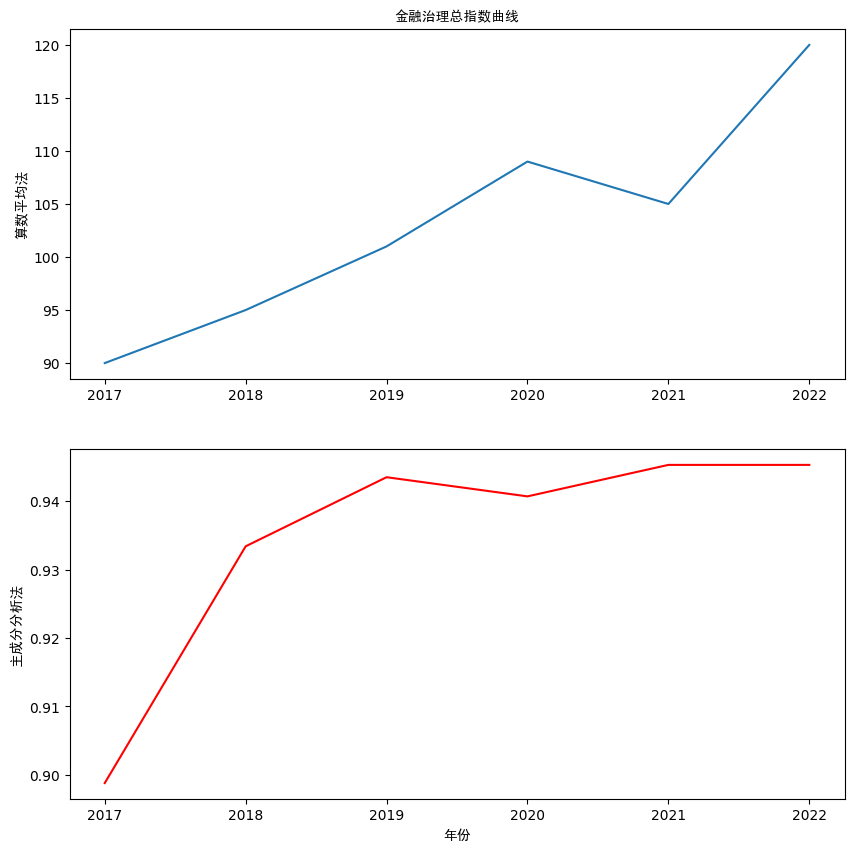

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [2017,2018,2019,2020,2021,2022]#点的横坐标
k1 = [90,95,101,109,105,120]#线1的纵坐标
k2 = [0.8988,0.9334,0.9435,0.9407,0.9453,0.9453]#线2的纵坐标

plt.figure(figsize=(10,10),dpi=100)
plt.subplot(2,1,1)
# ax1 = fig.add_subplot(111)
plt.plot(x, k1, label="")
plt.ylabel('算数平均法',fontproperties=zhfont)
plt.title("金融治理总指数曲线",fontproperties=zhfont)

plt.subplot(2,1,2)
# ax2 = ax1.twinx()  # this is the important function
plt.plot(x, k2, 'r', label="z")

plt.ylabel("主成分分析法",fontproperties=zhfont)
plt.xlabel('年份', fontproperties=zhfont)

plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

y1 = np.array([90,95,101,109,105,120])
y2 = np.array([0.8988,0.9334,0.9435,0.9407,0.9453,0.9453])

X = np.array([[2017], [2018], [2019], [2020], [2021], [2022]])
reg1 = LinearRegression().fit(X, y1)
reg2 = LinearRegression().fit(X, y2)
print("2023年算数平均法的预测为",reg1.predict(np.array([[2023]])))
print("2023年主成分分析法的预测",reg2.predict(np.array([[2023]])))
print("两者的相关系数：",reg1.score(X, y1), reg2.score(X, y2))


2023年算数平均法的预测为 [122.13333333]
2023年主成分分析法的预测 [0.96104]
两者的相关系数： 0.8931266846361186 0.6179272809577037
